<div style="border:solid green 3px; padding: 20px">
																							
<b>Привет!</b>
																					
Меня зовут Сороколетов Илья и я буду проверять твой проект. 
																					
Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)
																					
																					
Для твоего удобства, я буду выделять свои комментарии следующим образом:
																					
<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>
																					
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.
																					
</div>
																					
<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>
																					
																					
Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.
																					
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>
																					
<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 
																					
Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху
																					
Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)
																					
P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
																					    
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

### Описание данных

* **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)

* **balcony** — число балконов

* **ceiling_height** — высота потолков (м)

* **cityCenters_nearest** — расстояние до центра города (м)

* **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

* **first_day_exposition** — дата публикации

* **floor** — этаж

* **floors_total** — всего этажей в доме

* **is_apartment** — апартаменты (булев тип)

* **kitchen_area** — площадь кухни в квадратных метрах (м²)

* **last_price** — цена на момент снятия с публикации

* **living_area** — жилая площадь в квадратных метрах (м²)

* **locality_name** — название населённого пункта

* **open_plan** — свободная планировка (булев тип)

* **parks_around3000** — число парков в радиусе 3 км

* **parks_nearest** — расстояние до ближайшего парка (м)

* **ponds_around3000** — число водоёмов в радиусе 3 км

* **ponds_nearest** — расстояние до ближайшего водоёма (м)

* **rooms** — число комнат

* **studio** — квартира-студия (булев тип)

* **total_area** — общая площадь квартиры в квадратных метрах (м²)

* **total_images** — число фотографий квартиры в объявлении

### Изучение датафрейма

In [3]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


 <div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой
			
	pd.set_option('display.max_columns', None)
</div>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


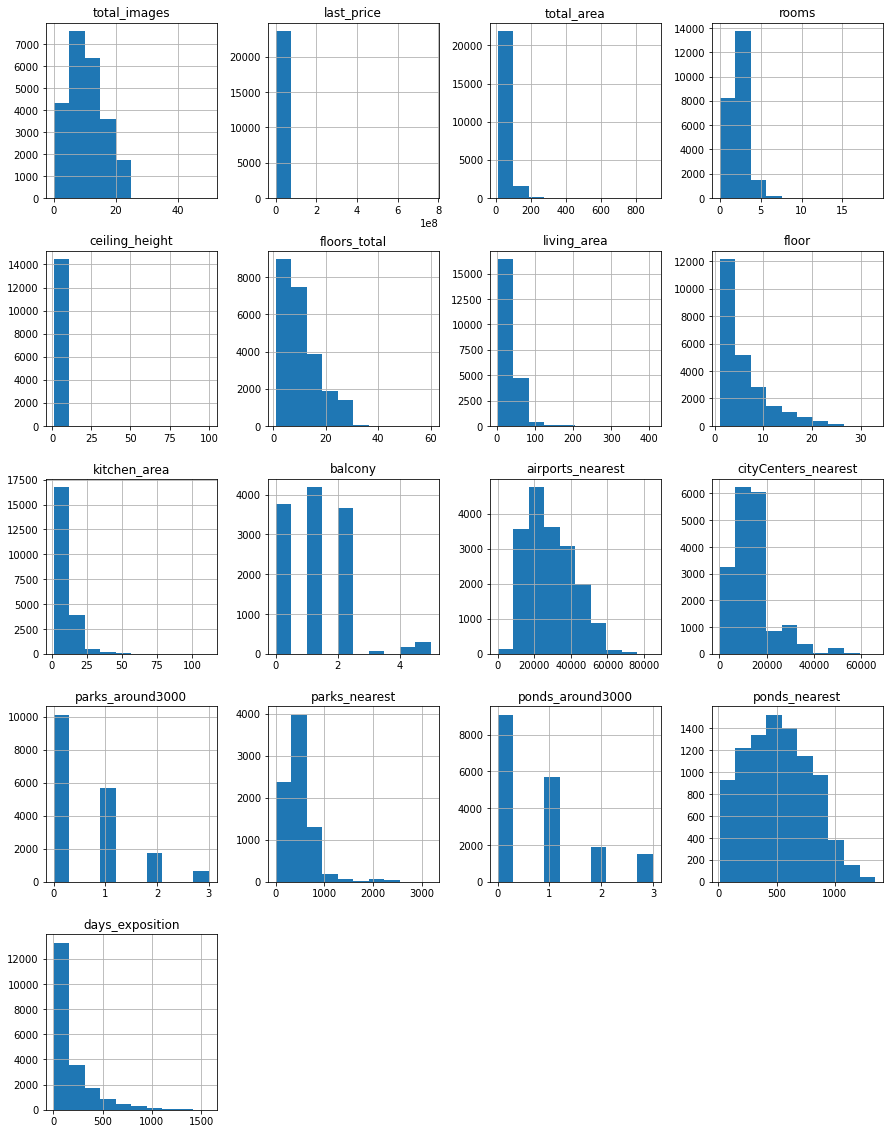

In [6]:
data.hist(figsize=(15, 20))
plt.show()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>

**Вывод:** 

В данных есть пропуски и аномальные значения, а также, возможно, дубликаты названий населённых пунктов. Попробуем разобраться с этим.

## Предобработка данных

### Обработка пропусков

Выведим количество пропущенных значений для каждого столбца:

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением для столбца с высотой потолков, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

Скорее всего, пропуски в столбце «ceiling_height» случайны. Возможно, продавец не знает высоту потолков, забыл её указать или не заметил этот пункт. Поскольку высота потолков соответствует определённым стандартам, данные не сильно исказятся, если заполнить пропуски медианным значением.

Пропуски в столбце «floors_total» было решено оставить, так как мы не можем с уверенностью утверждать, сколько в доме этажей. Скорее всего, эти пропуски тоже случайны.

In [9]:
data['is_apartment'].fillna(False, inplace=True)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Заполним столбец «is_apartment» значением False, предполагая, что если значение пропущено, то помещение, скорее всего, не является апартаментами.

In [10]:
data['balcony'].fillna(0, inplace=True)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Таким же образом поступим со столбцом «balcony», заменив пропущенные значения на 0.

Пропуски в столбце «days_exposition», скорее всего, означают, что объявление не было снято с публикации.

In [11]:
data = data.dropna(subset=['locality_name'])

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Удалить пропуски в столбце locality_name - это хорошее решение. 
</div>

Также не удастся заполнить пропуски в столбце «locality_name», так как невозможно узнать названия пропущенных населённых пунктов. Поэтому удалим их, чтобы они не мешали дальнейшему исследованию.

**Вывод:**

* При заполнении остальных пропусков в столбцах с данными медианным или средним значением, мы рискуем получить результаты, которые будут значительно отличаться от реальных. Например, заполняя столбец «parks_nearest» средним значением, мы можем указать расстояние до водоёма, которое возможно будет сильно отличаться от действительного. Это может привести к тому, что результаты исследования окажутся далёкими от реальных данных. Аналогично, заполнение пропусков в столбцах «kitchen_area» и «living_area» может исказить параметры, которые могут повлиять на стоимость жилья, что, в свою очередь, может привести к ошибочным выводам.

* В DataFrame есть довольно много пропусков в данных, полученных из геосервисов. Стоит обратиться к ответственному. Скорее всего, пропуски в данных вызваны какой-то технической неполадкой, однако для учебного исследования нам должно хватить и имеющихся данных.


### Изменение типов данных

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

Изменим тип данных в столбце «first_day_exposition» с object на datetime64, чтобы в дальнейшем иметь возможность выполнять операции с датами.

В столбце «is_apartment» тип данных изменился с object на bool, когда мы заполнили пропуски.

In [13]:
data['last_price'] = data['last_price'].astype(int)

Скорее всего, в столбце «last_price» должен быть целочисленный тип данных.

### Обработка дубликатов

In [14]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [15]:
len(data['locality_name'].unique())

364

In [16]:
data['locality_name'] = (
    data['locality_name'].str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок'],'поселок',regex=True)
)

In [17]:
len(data['locality_name'].unique())

322

Таким образом, заменив в названиях населённых пунктов «ё» на «е» и «поселок городского типа» и «городской поселок» на «посёлок», мы избавились от 42 неявных дубликатов.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

### Обработка аномальных значений

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Привет! Где синий текст, там мои исправления.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Привет! Принято)
</div>

**«ceiling_height»**

In [18]:
very_high_ceilings = data.query('ceiling_height > 10')['ceiling_height']
ceilings_normal_height = []

def lowering_ceiling(value):
    for i in value:
        division = i / 10
        ceilings_normal_height.append(division)
        

result = lowering_ceiling(very_high_ceilings)


indices = very_high_ceilings.index

for i, v in zip(indices, ceilings_normal_height):
    data.at[i, 'ceiling_height'] = v

В столбце «ceiling_height» некоторые значения высоты потолков равны высоте двухэтажных и более домов. Можно предположить, что на самом деле это вещественные значения, а не целые числа. Исправим эту ошибку.

In [19]:
data = data[(data['ceiling_height'] > 2) & (data['ceiling_height'] <= 6)]

Минимальный стандарт высоты потолков составляет примерно 2,5 метра. При этом для комфортного проживания потолок должен быть не ниже 15–20 см над головой, поэтому потолки ниже 2 метров выглядят не очень реалистично. Также выглядят и потолки выше 7 метров. Удалим строки, в которых высота потолка меньше 2 метров и выше 6 метров.

**«last_price»**

In [20]:
data.query('last_price < 100000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0.0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


В столбце «last_price» присутствует строка со значением 12190. Скорее всего, что это число указано в тысячах. Исправим эту ошибку.

In [21]:
data['last_price'] = data['last_price'].replace(12190, 12190000)

In [22]:
data = data[data['last_price'] < 100000000] 

<font color='blue'> Удалим аномальные значения стоимости квартир, которые превышают 100 000 000. </font>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Аномалии остались. Давай разберём на примере общей площади (график ниже). На графике чётко видно, что после 200м квартир практически нет, а после 300 линии даже не видно. В данном случае аномальными значениями можно считать все квартиры больше 200-300м. Значит эти значения нужно отбросить. Удали аномалии в столбцах с общей площадью, общей ценой и количеством комнат
</div>


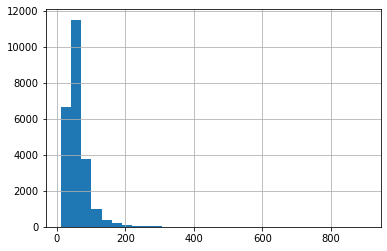

In [23]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

**«floors_total»** 

In [24]:
data = data[data['floors_total'] <= 37]

Самое высокое здание в Санкт-Петербурге — это ЖК «Князь Александр Невский», в нём 37 этажей. Удалим строки, в которых больше 37 этажей.

<font color='blue'> «rooms» </font>

In [25]:
data = data[data['rooms'] <= 8]

<font color='blue'> Чтобы исключить из анализа аномалии, удалим данные о квартирах с количеством комнат больше 8. </font>

<font color='blue'> «total_area» </font>

In [26]:
data = data[data['total_area'] <= 300]

<font color='blue'> Удалим аномальные значения площади квартир, которые больше 300 м². </font>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Теперь всё верно)
</div>

## Промежуточные вычисления

In [27]:
data['square_meter_price'] = (data['last_price'] / data['total_area']).round(2)

Добавим в таблицу столбец «square_meter_price», который будет хранить в себе цену одного квадратного метра.

In [28]:
data['day_week_publication'] = data['first_day_exposition'].dt.weekday

Добавим в таблицу столбец «day_week_publication», который будет хранить в себе номер дня недели публикации объявления.

In [29]:
data['month_publication'] = data['first_day_exposition'].dt.month

Добавим в таблицу столбец «month_publication», который будет хранить в себе месяц публикации объявления.

In [30]:
data['year_publication'] = data['first_day_exposition'].dt.year

Добавим в таблицу столбец «year_publication», который будет хранить в себе год публикации объявления.

In [31]:
def categorize_floor(value):
    floor = value['floor']
    floors_total = value['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
data['type_floor'] = data.apply(categorize_floor, axis=1)    

Добавим в таблицу столбец «type_floor», который будет хранить в себе тип этажа квартиры.

In [32]:
data['city_centers_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)

Добавим в таблицу столбец «city_centers_nearest_km», который будет хранить в себе расстояние до центра города в километрах.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

## Исследовательский анализ данных

### Общая площадь

In [33]:
data['total_area'].describe()

count    23448.000000
mean        59.192884
std         29.807379
min         12.000000
25%         40.000000
50%         52.000000
75%         69.100000
max        300.000000
Name: total_area, dtype: float64

<AxesSubplot:>

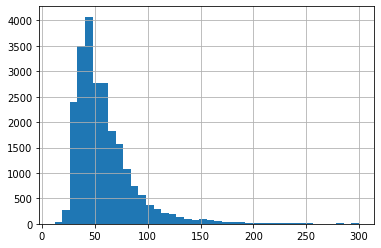

In [34]:
data['total_area'].hist(bins=40)

**Вывод:**

Анализ графика показывает, что большинство квартир имеют  общую площадь в диапазоне приблизительно от 25 до 100 м². Однако, наблюдаются и единичные случаи квартир с площадью превывающей 200 м², что характерно для объектов элитной недвижимости.

### Жилая площадь

In [35]:
data['living_area'].describe()

count    21600.000000
mean        33.884685
std         19.381754
min          2.000000
25%         18.600000
50%         30.000000
75%         42.100000
max        250.000000
Name: living_area, dtype: float64

<AxesSubplot:>

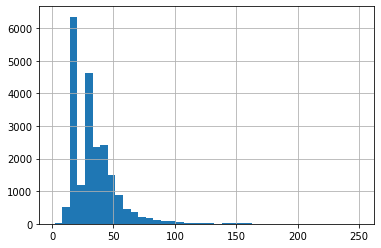

In [36]:
data['living_area'].hist(bins=40)

**Вывод:**

Наибольшее количество предложений приходится на квартиры с жилой площадью приблизительно от 15 до 60 м².

### Площадь кухни

In [37]:
data['kitchen_area'].describe()

count    21246.000000
mean        10.474999
std          5.609864
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

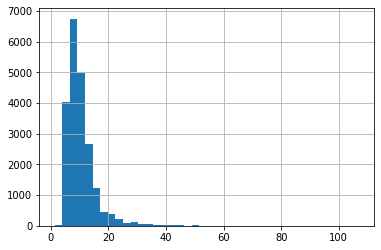

In [38]:
data['kitchen_area'].hist(bins=40)

**Вывод:**

В основном в данных представлены квартиры, площадь кухни которых находится в диапазоне примерно от 5 до 20 м².

### Цена объекта

In [39]:
data['last_price'].describe()

count    2.344800e+04
mean     6.160524e+06
std      6.063534e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      9.900000e+07
Name: last_price, dtype: float64

<AxesSubplot:>

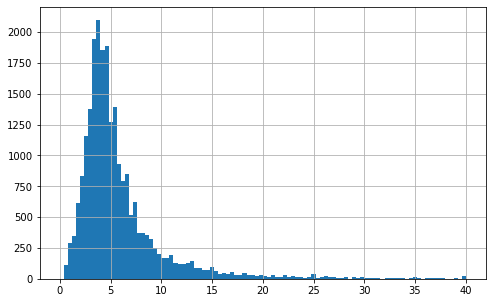

In [40]:
last_price_divide_by_million = data['last_price'] / 1000000
last_price_divide_by_million.hist(bins=100, figsize=(8, 5), range=(0, 40))

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тут необходимо поиграться с параметром range, чтобы график стал более понятным, а если ещё разделить все значения на 1млн, то будет совсем хорошо)
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

**Вывод:**

На гистограмме видно, что основная часть квартир находится в ценовом диапазоне приблизительно до 9 000 000 рублей.

### Количество комнат

In [41]:
data['rooms'].describe()

count    23448.000000
mean         2.053267
std          1.025135
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

<AxesSubplot:>

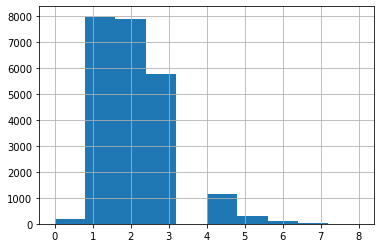

In [42]:
data['rooms'].hist()

**Вывод:**

В основном в данных представлены квартиры с количеством комнат от 0 (что характерно для студий, апартаментов или квартир со свободной планировкой) до 3.

### Высота потолков

In [43]:
data['ceiling_height'].describe()

count    23448.000000
mean         2.695051
std          0.214362
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

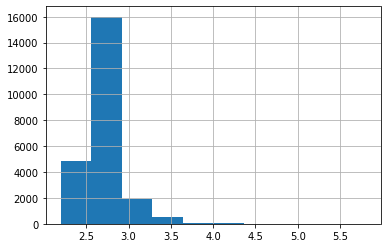

In [44]:
data['ceiling_height'].hist()

Высота потолков в основном составляет примерно от 2,3 до 3 метров.

### Тип этажа квартиры

In [45]:
data['type_floor'].describe()

count      23448
unique         3
top       другой
freq       17258
Name: type_floor, dtype: object

<AxesSubplot:>

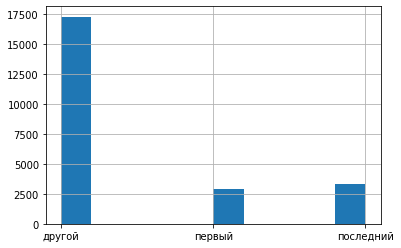

In [46]:
data['type_floor'].hist()

В датафрейме представлено меньше квартир на первом этаже, чем на последнем. Количество квартир, расположенных на этажах, типа «другой», составляет 17393, что превышает суммарное количество квартир на первом и последнем этажах. 

### Общее количество этажей в доме

In [47]:
data['floors_total'].describe()

count    23448.000000
mean        10.688715
std          6.583940
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

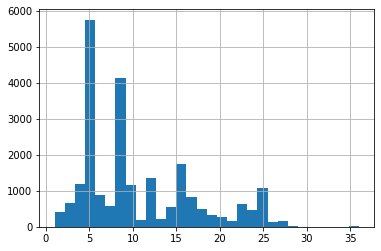

In [48]:
data['floors_total'].hist(bins=30)

In [49]:
data['floors_total'].value_counts()

5.0     5750
9.0     3752
16.0    1371
12.0    1358
4.0     1181
10.0    1173
25.0    1074
6.0      893
17.0     831
3.0      657
7.0      574
14.0     552
18.0     504
24.0     462
8.0      381
2.0      376
15.0     364
23.0     349
19.0     339
22.0     286
20.0     269
13.0     228
11.0     202
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
33.0       1
29.0       1
Name: floors_total, dtype: int64

По количеству объявлений лидируют пятиэтажные дома, значительно опережая остальные. На втором месте находятся девятиэтажные дома, также с заметным отрывом. Третье место делят между собой дома в 12 и 16 этажей.

### Расстояние до центра города в метрах

In [50]:
data['cityCenters_nearest'].describe()

count    17959.000000
mean     14227.678323
std       8604.854288
min        181.000000
25%       9289.500000
50%      13123.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

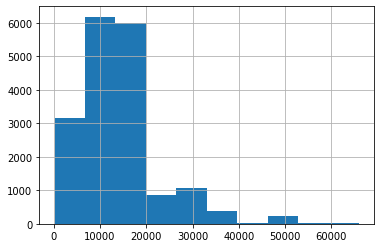

In [51]:
data['cityCenters_nearest'].hist()

Основная часть представленной в данных недвижимости расположена на расстоянии от 8 до 20 километров от центра города. Кроме того, в данных представлено больше недвижимости, расположенной в радиусе 8 километров от центра города, чем объектов, находящихся на расстоянии более 20 километров от центра.

### Расстояние до ближайшего парка

In [52]:
data['parks_nearest'].describe()

count    7954.000000
mean      491.022630
std       342.147844
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

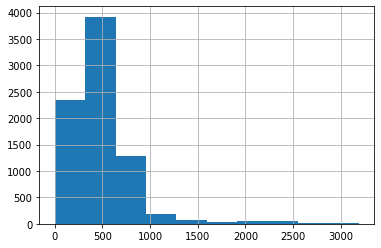

In [53]:
data['parks_nearest'].hist()

Большинство квартир расположено приблизительно в радиусе до 600 метров от парков.

In [54]:
data.query('parks_nearest < 10')[['parks_nearest', 'locality_name', 'type_floor', 'rooms', 'total_area', 'square_meter_price']]

,parks_nearest,locality_name,type_floor,rooms,total_area,square_meter_price
2527,9.0,Кронштадт,другой,2,60.3,77777.78
9344,7.0,Санкт-Петербург,первый,1,28.1,106761.57
11949,3.0,Санкт-Петербург,другой,2,44.0,102272.73
14624,1.0,Санкт-Петербург,другой,2,45.4,83039.65
20193,9.0,Санкт-Петербург,другой,3,102.6,115104.00
22941,4.0,Зеленогорск,последний,1,69.3,158225.11


В данных представлено 6 вариантов, где парк находится буквально через дорогу или даже на расстоянии одного шага.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Для остальных графиков ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

### Скорость продажи квартир

In [55]:
data['days_exposition'].describe()

count    20300.000000
mean       180.320887
std        219.346059
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

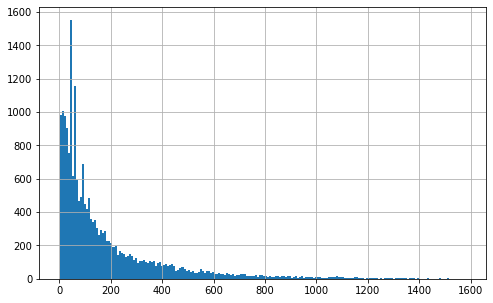

In [56]:
data['days_exposition'].hist(bins=200, figsize=(8, 5))

 🤔 Пик гистограммы совпадает с медианой. Гистограмма имеет длинный хвост, образованный редкими большими значениями, что должно оказывать значительное влияние на среднее значение.

In [57]:

    fast_purchase_because_rooms = data.pivot_table(
    index='rooms', 
    values='days_exposition', 
    aggfunc=['mean', 'median', 'count']
)

fast_purchase_because_rooms.columns = ['среднее', 'медиана', 'количество']
 
fast_purchase_because_rooms.query('количество > 100')


,среднее,медиана,количество
rooms,,,
0,110.435754,49.0,179
1,158.919828,81.0,7222
2,172.958776,91.0,6865
3,203.941238,114.0,4782
4,253.779826,154.0,922
5,297.575107,168.0,233


Количество студий и квартир свободной планировки в выборке данных ограничено для формирования надежных выводов. Тем не менее, наблюдается тенденция, согласно которой жилье с меньшим количеством комнат имеет более низкую стоимость и продается быстрее. В частности, однокомнатные квартиры продаются быстрее, чем квартиры с большим количеством комнат, в то время как продажа четырех и пятикомнатных квартир может занимать значительное время.

In [58]:
fast_purchase_in_month = data.pivot_table(
    index='month_publication', 
    values='days_exposition', 
    aggfunc=['mean', 'median', 'count']
)
fast_purchase_in_month.columns = ['среднее', 'медиана', 'количество']
fast_purchase_in_month

,среднее,медиана,количество
month_publication,,,
1,184.598431,88.0,1275
2,169.585022,90.0,2270
3,201.258691,108.0,1956
4,200.090970,125.0,1495
5,221.606140,134.0,1140
6,195.224096,114.0,1660
7,174.787918,92.0,1556
8,153.314607,82.0,1602
9,164.768979,89.0,1831


🤔Наиболее активный спрос на квартиры наблюдается в ноябре, в то время как весной продажи  замедляются.

Предположим, что быстрые продажи — это продажи, которые заняли до трёх месяцев, а долгие — от шести и более. Рассчитаем медиану для этих диапазонов.

In [59]:
print('Медиана быстрых продаж', data.query('days_exposition <= 95')['days_exposition'].median().round(0))

print('Медиана долгих продаж', data.query('days_exposition >= 180')['days_exposition'].median().round(0))

Медиана быстрых продаж 45.0
Медиана долгих продаж 349.0


**Вывод:**

Скорость продажи недвижимости зависит от множества факторов, включая доступность жилья и сезонные тенденции. Продажи, завершенные в течение полутора месяца, предполагаю можно считать быстрыми, в то время как продажи, занимающие более года, можно отнести к категории  долгих.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

### Факторы, влияющие на полную стоимость объекта

#### Влияние общей площади на стоимость объекта

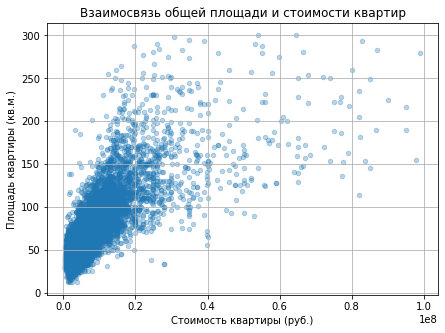

In [60]:
data.plot(
    x='last_price',
    y='total_area', 
    grid=True, 
    kind='scatter', 
    alpha=0.3, 
    figsize=(7, 5)
)
plt.ylabel('Площадь квартиры (кв.м.)')
plt.xlabel('Стоимость квартиры (руб.)')
plt.title('Взаимосвязь общей площади и стоимости квартир')
plt.show()

**Вывод:**

Диаграмма рассеяния демонстрирует положительную корреляцию между площадью квартир и их стоимостью. В целом, чем больше площадь квартиры, тем выше ее цена. Однако наблюдаются выбросы – отдельные точки, значительно отклоняющиеся от общей тенденции, что может указывать на наличие дорогих квартир небольшой площади, например, в элитных районах города.

#### Влияние жилой площади на стоимость объекта

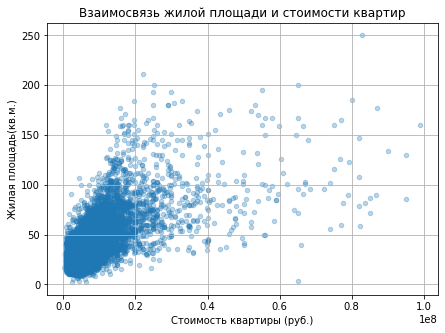

In [61]:
data.plot(
    x='last_price',
    y='living_area', 
    grid=True, 
    kind='scatter', 
    alpha=0.3, 
    figsize=(7, 5)
)
plt.ylabel('Жилая площадь(кв.м.)')
plt.xlabel('Стоимость квартиры (руб.)')
plt.title('Взаимосвязь жилой площади и стоимости квартир')
plt.show() 


**Вывод:**

На диаграмме рассеяния видно, что между жилой площадью квартир и их стоимостью прослеживается положительная корреляция. Чем больше жилая площадь, тем выше стоимость квартиры. Однако здесь также присутствуют выбросы. 

#### Влияние общей площади кухни на стоимость объекта

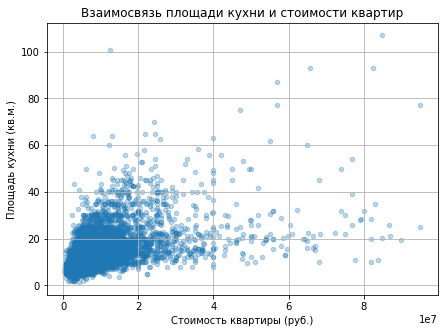

In [62]:
data.plot(
    x='last_price',
    y='kitchen_area', 
    grid=True, 
    kind='scatter', 
    alpha=0.3, 
    figsize=(7, 5)
)
plt.ylabel('Площадь кухни (кв.м.)')
plt.xlabel('Стоимость квартиры (руб.)')
plt.title('Взаимосвязь площади кухни и стоимости квартир')
plt.show() 

**Вывод:**

Диаграмма рассеяния демонстрирует положительную корреляцию между площадью кухни и стоимостью квартиры. В целом, чем больше площадь кухни, тем выше стоимость квартиры. Однако, наблюдается значительное количество точек, расположенных в левой части графика при небольшой площади кухни, что говорит о том, что площадь кухни не является основным фактором, влияющим на стоимость квартиры.

#### Влияние количество комнат на стоимость объекта

Перед построением столбчатой диаграммы исключим из данных квартиры с количеством комнат более 6, так как небольшое количество наблюдений в этих категориях делают выборку нерепрезентативной.

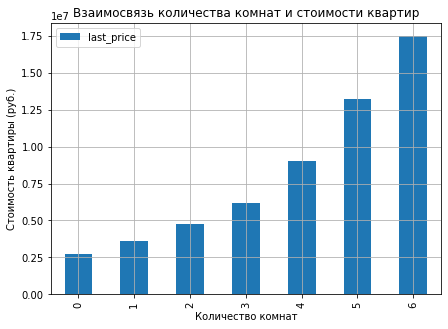

In [63]:
(
    data.query('rooms <= 6').
    pivot_table(index='rooms', 
                values='last_price', 
                aggfunc='median')
    .plot(kind='bar', 
          grid=True,
          figsize=(7, 5))
)

plt.ylabel('Стоимость квартиры (руб.)')
plt.xlabel('Количество комнат')
plt.title('Взаимосвязь количества комнат и стоимости квартир')
plt.show() 

**Вывод:** 

На графике наблюдается положительная зависимость между количеством комнат в квартире и ее средней стоимостью: с увеличением количества комнат цена возрастает. Самые дорогие квартиры представлены в категории с 6 комнатами, а наиболее доступные — в категориях с 0-1 комнатами.

#### Влияние типа этажа, на котором расположена квартира на стоимость объекта

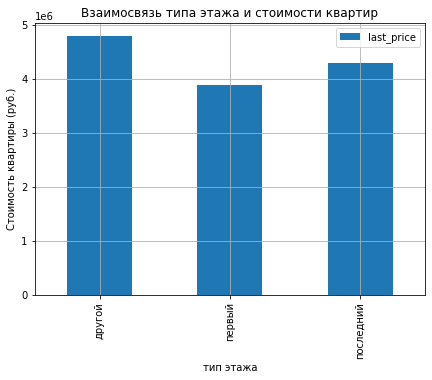

In [64]:
(
    data.pivot_table(index='type_floor', 
                     values='last_price', 
                     aggfunc='median')
    .plot(kind='bar', 
          grid=True,
          figsize=(7, 5))
)


plt.ylabel('Стоимость квартиры (руб.)')
plt.xlabel('тип этажа')
plt.title('Взаимосвязь типа этажа и стоимости квартир')
plt.show()  



**Вывод:**

Медианная стоимость квартир на  других этажах  выше, чем  стоимость квартир на первом этаже.

#### Влияние даты размещения на стоимость объекта 

**Влияние дня недели на стоимость объекта**

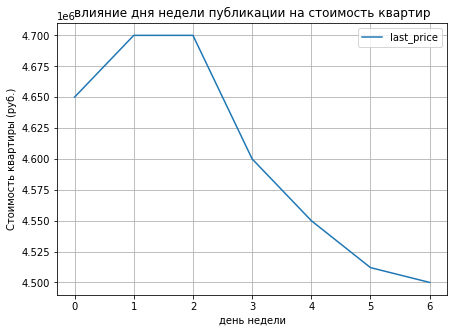

In [65]:
(
    data.pivot_table(index='day_week_publication', 
                     values='last_price', 
                     aggfunc='median')
    .plot(grid=True,
          figsize=(7, 5))
)

plt.ylabel('Стоимость квартиры (руб.)')
plt.xlabel('день недели')
plt.title('влияние дня недели публикации на стоимость квартир')
plt.show()  

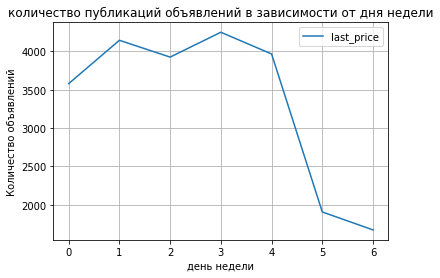

In [66]:
(data.pivot_table(index='day_week_publication', 
                 values='last_price', 
                 aggfunc='count')
.plot(grid=True)
)

plt.ylabel('Количество объявлений')
plt.xlabel('день недели')
plt.title('количество публикаций объявлений в зависимости от дня недели')
plt.show()  

**Вывод:**

В начале недели стоимость жилья немного выше, чем в конце, и количество новых объявлений больше.

**Влияние месяца размещения на стоимость объекта**

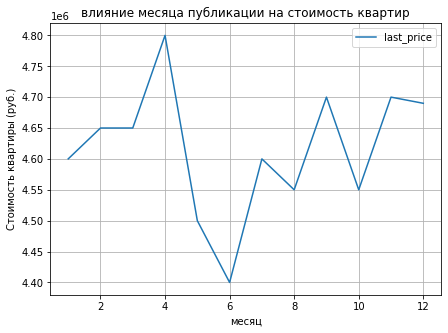

In [67]:
(
    data.pivot_table(index='month_publication', 
                     values='last_price', 
                     aggfunc='median')
    .plot(grid=True,
          figsize=(7, 5))
)

plt.ylabel('Стоимость квартиры (руб.)')
plt.xlabel('месяц')
plt.title('влияние месяца публикации на стоимость квартир')
plt.show()  

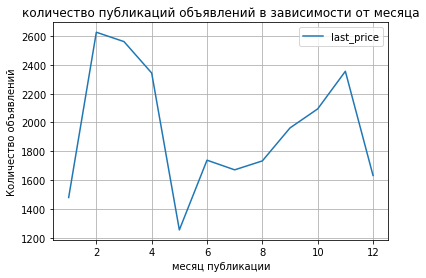

In [68]:
(data.pivot_table(index='month_publication', 
                 values='last_price', 
                 aggfunc='count')
.plot(grid=True)
)

plt.ylabel('Количество объявлений')
plt.xlabel('месяц публикации')
plt.title('количество публикаций объявлений в зависимости от месяца')
plt.show()  

**Вывод:** 

Самая высокая стоимость наблюдается в апреле, после чего происходит резкое снижение. В июне наблюдается минимальная стоимость, после чего цена снова повышается, достигая максимума в сентябре. С ноября по декабрь цена держится на стабильном уровне. Это связано с сезонным уровнем спроса.

**Влияние года размещения на стоимость объекта**

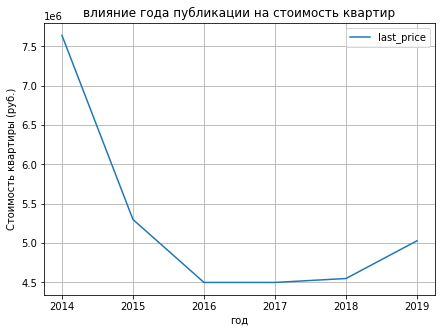

In [69]:
(
    data.pivot_table(index='year_publication', 
                     values='last_price', 
                     aggfunc='median')
    .plot(grid=True,
          figsize=(7, 5))
)

plt.ylabel('Стоимость квартиры (руб.)')
plt.xlabel('год')
plt.title('влияние года публикации на стоимость квартир')
plt.show()  

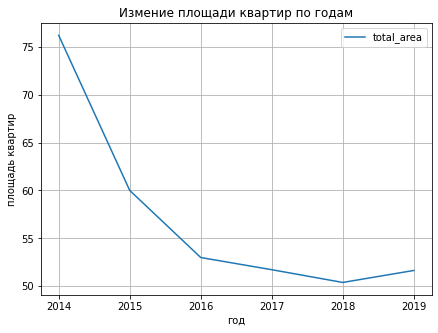

In [70]:
(
    data.pivot_table(index='year_publication', 
                     values='total_area', 
                     aggfunc='median')
    .plot(grid=True,
          figsize=(7, 5))
)

plt.ylabel('площадь квартир')
plt.xlabel('год')
plt.title('Измение площади квартир по годам')
plt.show()  

**Вывод:**
На графике можно увидеть, что в 2014 году стоимость была максимальной и составляла около 7,7 млн рублей. После этого наблюдается тенденция к снижению цены. В 2016 году можно заметить, что цена стабилизировалась, а в последующие годы  наблюдается небольшой рост с 2018 года. К 2019 году цена достигла примерно 5 млн рублей. Отчасти это произошло из-за тенденции к уменьшению площади квартир.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Зависимость цены изучена верно! Ещё тут можно использовать для визуализации pairplot из библиотеки seaborn 
    
    https://seaborn.pydata.org/generated/seaborn.pairplot.html
</div>

### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [71]:
top_10_squere_meter = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean'])
top_10_squere_meter.columns = ['количество', 'средняя стоимость (кв. м)']
top_10_squere_meter.sort_values(by='количество', ascending=False).head(10)


,количество,средняя стоимость (кв. м)
locality_name,,
Санкт-Петербург,15551,113561.992653
поселок Мурино,552,85629.568641
поселок Шушары,439,78551.344647
Всеволожск,397,68719.320378
Пушкин,367,103130.851826
Колпино,337,75333.295816
поселок Парголово,327,90175.913089
Гатчина,307,68746.146515
деревня Кудрово,299,92473.547559


**Вывод:**

Самая высокая стоимость квадратного метра в Санкт-Петербурге (114737.440652). Самая низкая стоимость квадратного метра в Выборге (58238.143277).

### Средняя стоимость квартир в Санкт-Петербурге на разном удалении от центра

In [72]:
Saint_Petersburg_centers_nearest = (
    data.query('locality_name == "Санкт-Петербург"')
    [['city_centers_nearest_km', 'last_price']]
    .pivot_table(index='city_centers_nearest_km', 
                 values='last_price')
)
Saint_Petersburg_centers_nearest

,last_price
city_centers_nearest_km,
0.0,2.654331e+07
1.0,1.570115e+07
2.0,1.441889e+07
3.0,1.065498e+07
4.0,1.131852e+07
5.0,1.235424e+07
6.0,1.313514e+07
7.0,1.378578e+07
8.0,9.116252e+06


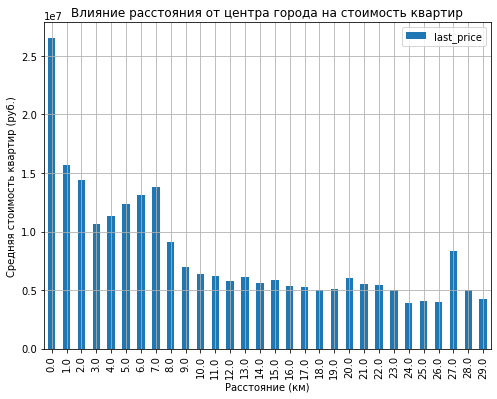

In [73]:
Saint_Petersburg_centers_nearest.plot(kind='bar', figsize=(8, 6), grid=True)
plt.ylabel('Средняя стоимость квартир (руб.)')
plt.xlabel('Расстояние (км)')
plt.title('Влияние расстояния от центра города на стоимость квартир')
plt.show()

**Вывод:** 

Стоимость объекта недвижимости обратно пропорциональна расстоянию до центра города. С увеличением расстояния от центра стоимость объекта снижается.
На графике это отражается следующим образом: до 3 км от центра цена резко падает, после чего, на расстоянии от 4 до 7 км от центра, она начинает немного увилчиваться. После 8 км от центра цена продолжает плавно снижаться.
Однако в районе 27 км от центра наблюдается скачок цены. Это может быть связано с наличием в этом районе объектов премиум-класса.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10 по средней цене, так будет более наглядно)
</div>

## Общий вывод

Изучив архив данных о продажах квартир в Санкт-Петербурге и ближайших населенных пунктах, полученных с сервиса Яндекс Недвижимость, мы выявили ряд факторов, влияющих на стоимость и скорость продажи жилья. 

**Скорость продажи:**

Несмотря на то, что скорость продажи квартир может зависеть от различных факторов, на основании имеющихся данных мы сделали вывод, что медленными продажами можно считать те, на реализацию которых потребовалось больше года, а быстрыми — те, которые произошли в течение 1–2 месяцев.

**Стоимость:**

* Площадь: чем больше площадь, тем выше стоимость.

* Количество комнат: также оказывает влияние на стоимость.

* Этаж: этаж, на котором расположена квартира, оказывает незначительное влияние на стоимость, однако квартиры на первом этаже всё-таки немного дешевле чем остальные предложения.

* Месяц размещения объявления: Сезонные колебания спроса на жилье могут приводить к изменению стоимости. В некоторые периоды года спрос снижается, что может привести к уменьшению стоимости квартир.

* С 2014 по 2016 год стоимость квартир падала, что было отчасти связано с тенденцией уменьшения площади квартир. В дальнейшем стоимость сначала стабилизировалась, а с 2017 года начала расти.

* Местоположение: 

   * Город: Самые дорогие квадратные метры в представленных данных – в Санкт-Петербурге, самые дешевые – в Выборге. 
   
   * Расстояние до центра города: существует тенденция, согласно которой, чем ближе квартира к центру Санкт-Петербурга, тем выше её стоимость.



<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Необходимо поправить:
<br>- отбросить аномальные значения 
<br>- поправить график для столбца last_price

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.